In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [27]:

class power():
    
    def __init__(self):
        self.site_noise = 5 #standard dev of phenotype across whole site (different plots, same site)
        self.plot_noise = 3 #standard dev of phenotype across a single plot (different plants, same plot)
        self.sample_noise = 1 #standard dev of phenotype sampled indentically and repeatedly (same plant/leaf)

        self.num_plots = 20 #samples of site_noise distribution
        self.num_samples = 15 #samples of plot_noise distribution
        self.num_subsamples = 1 #samples of sample_noise distribution
        
        self.num_trials = 1000

    def create_measurement_dist(self):
        self.draws = []
        site_draws = np.random.normal(0, self.site_noise, self.num_plots)
        for s in site_draws:
            sample_draws = np.random.normal(s, self.plot_noise, self.num_samples)
            if self.num_subsamples > 1:
                for sa in sample_draws:
                    subsample_draws = np.random.normal(sa, self.sample_noise, self.num_subsamples)
                    self.draws.append(subsample_draws)
            else:
                self.draws.append(sample_draws)

        self.draws = np.concatenate(self.draws)

    def calc_mdd(self):
        self.mdd = []
        self.mean = []
        for n in np.arange(self.num_trials):
            self.create_measurement_dist()
            self.mdd.append(2.8*np.std(self.draws)/np.sqrt(len(self.draws)))
            self.mean.append(np.mean(self.draws))


/opt/miniconda3/envs/spacen37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/envs/spacen37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


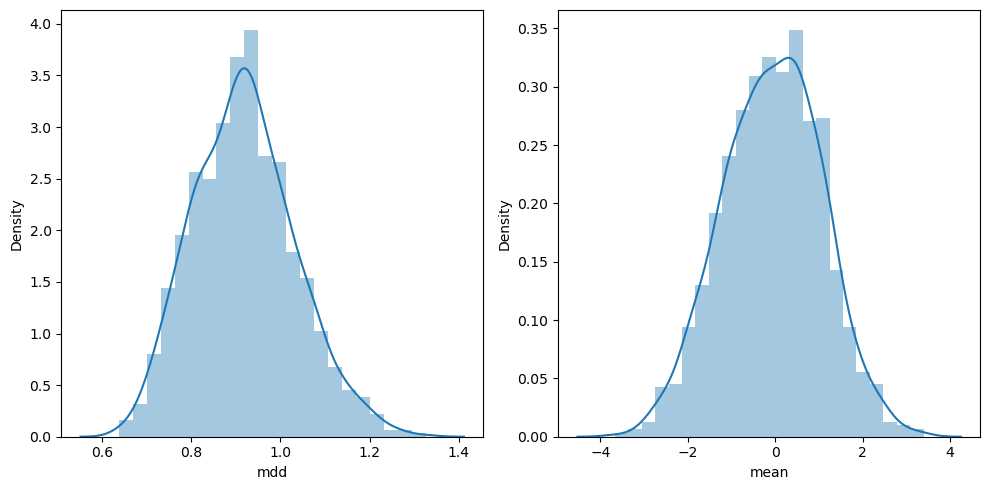

In [28]:
#example?

p = power()
p.calc_mdd()

f,ax = plt.subplots(1,2, figsize=(10,5))
sns.distplot(p.mdd, ax=ax[0])
ax[0].set_xlabel('mdd')

#also plotting the mean - in principle this is 0)
sns.distplot(p.mean, ax=ax[1])
ax[1].set_xlabel('mean')
f.tight_layout()
plt.show()